<a href="https://colab.research.google.com/github/kashish1503/kashish1503/blob/main/projectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python
!pip install diffusers transformers accelerate

In [ ]:
import torch
import os
from huggingface_hub import HfApi
from pathlib import Path
from diffusers.utils import load_image
import numpy as np
import cv2
from PIL import Image

from diffusers import (
    ControlNetModel,
    StableDiffusionControlNetPipeline,
    UniPCMultistepScheduler,
)


<h2> Captions </h2>

In [ ]:
import os
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Load the Stable Diffusion model pipeline
model_name = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Define the caption for image generation
caption1 = "A couple watches a boat against a skyline"
caption2 = "The girl in the white strip is falling down as the girl in the blue strip challenges for the soccer ball"
caption3 = "A hiker is pointing towards the mountains"
caption4 = "Two kids play hockey in the snow"
caption5 = "A boat on the water"
caption6 = "A water bird standing at the ocean's edge"

# Generate the image
image = pipe(caption1).images[0]

# Save the generated image
output_path = "generated_image1.png"
image.save(output_path)
print(f"Image generated and saved to {output_path}")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved to generated_image1.png


<h2> Captions + Canny Edge </h2>

In [ ]:
checkpoint = "lllyasviel/control_v11p_sd15_canny"

# image = load_image("https://huggingface.co/lllyasviel/control_v11p_sd15_canny/resolve/main/images/input.png")

# image = np.array(image)

# low_threshold = 100
# high_threshold = 200

# image = cv2.Canny(image, low_threshold, high_threshold)
# image = image[:, :, None]
# image = np.concatenate([image, image, image], axis=2)
# control_image = Image.fromarray(image)

# control_image.save("/content/control.png")

controlnet = ControlNetModel.from_pretrained(checkpoint, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
  "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

generator = torch.manual_seed(33)
# image = pipe("a blue paradise bird in the jungle", num_inference_steps=20, generator=generator, image=control_image).images[0]

# image.save('/content/image_out.png')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

<h3> For single image </h3>


type_input:  <class 'PIL.Image.Image'>
INPUT
high_res: 
Image_reso:  (500, 369)


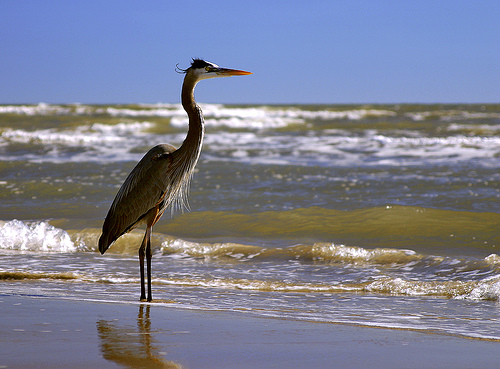

type_canny:  <class 'PIL.Image.Image'>


  0%|          | 0/20 [00:00<?, ?it/s]

OUTPUT
before_resize: 


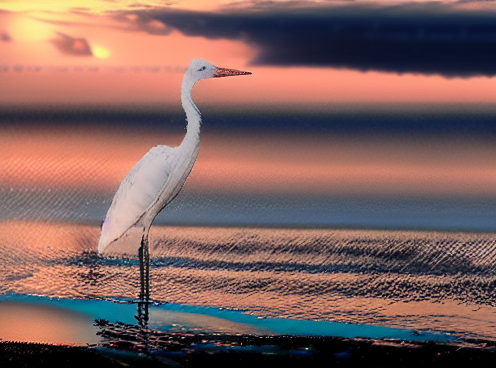

after_resize: 
image_resolution:  (128, 128)


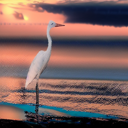

In [ ]:
image = load_image("/content/99679241_adc853a5c0.jpg")

lr_image = load_image("/content/90011335_cfdf9674c2.jpg")
new_size = (128,128)
# lr_image = lr_image.resize(new_size)
# image = image.resize(new_size)
print("type_input: ", type(image))
print("INPUT")
print("high_res: ")
print("Image_reso: ", image.size)
display(image)

# print("low_res: ")
# print("Image_reso: ", lr_image.size)
# display(lr_image)

image = np.array(image)

low_threshold = 100
high_threshold = 200

can_image = cv2.Canny(image, low_threshold, high_threshold)
can_image = can_image[:, :, None]
can_image = np.concatenate([can_image, can_image, can_image], axis=2)
control_image = Image.fromarray(can_image)
print("type_canny: ",type(control_image))
control_image.save("/content/control1.png")

image = pipe("A water bird standing at the ocean's edge", num_inference_steps=20, generator=generator, image=control_image).images[0]

image.save('/content/image_out.png')
print("OUTPUT")
print("before_resize: ")
display(image)
image = image.resize(new_size)
print("after_resize: ")
print("image_resolution: ", image.size)
display(image)


<h3> For multiple Image </h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
metadata={}
with open('/content/drive/MyDrive/best_captions.txt', 'r') as f:
  for line in f:
    file, text = line.strip().split(',', 1)
    metadata[file] = text

In [ ]:
count=0
for file in os.listdir('/content/drive/MyDrive/Images'):
  if count==2:
    break
  low_image=Image.open('/content/drive/MyDrive/lowres100/'+'low_res_'+file)
  hr_image=Image.open('/content/drive/MyDrive/High_images/'+file)
  low_image_np = np.array(low_image)
  hr_image_np = np.array(hr_image)

  # Apply Canny edge detection
  canny_image = cv2.Canny(hr_image_np, low_threshold, high_threshold)
  canny_image = canny_image[:, :, None]
  canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
  control_image = Image.fromarray(canny_image)

  # Save control image (optional, for debugging)
  control_image.save(os.path.join(control_folder, f"control_{idx + 1}.png"))
  text=metadata[file]
  low_image = low_image.resize((128, 128))
  # line_art = line_art.resize(low_image.size)
  low_image_array = np.array(low_image)
  # line_art_array = np.array(line_art)
  # low_image_tensor = torch.tensor(low_image_array).float().unsqueeze(0).permute(0, 3, 1, 2).to('cuda')
  # line_art_tensor = torch.tensor(line_art_array).float().unsqueeze(0).permute(0, 3, 1, 2).to('cuda')
  output = pipe(text, image=low_image, control_image=control_image).images[0]
  print("caption: ", text)
  print("size_li: ", low_image.size)
  print("size_la: ", control_image.size)
  print("size_o: ", output.size)
  display(low_image)
  display(control_image)
  display(output)
  output.save('/content/drive/MyDrive/output/'+'out_'+file)
  count+=1

*italicised text*<h2> Caption + Line Art </h2>

checkpoint = "ControlNet-1-1-preview/control_v11p_sd15_lineart"

In [ ]:
!pip install controlnet_aux==0.0.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 35.3 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.12
    Uninstalling timm-1.0.12:
      Successfully uninstalled timm-1.0.12


In [ ]:
from controlnet_aux import LineartDetector

from diffusers import (
    ControlNetModel,
    StableDiffusionControlNetPipeline,
    UniPCMultistepScheduler,
)

checkpoint = "ControlNet-1-1-preview/control_v11p_sd15_lineart"

# image = load_image(
#     "https://huggingface.co/ControlNet-1-1-preview/control_v11p_sd15_lineart/resolve/main/images/input.png"
# )
# image = image.resize((512, 512))

# prompt = "a black girl with light brown hairs"
# processor = LineartDetector.from_pretrained("lllyasviel/Annotators")

# control_image = processor(image)
# control_image.save("/content/control.png")

controlnet = ControlNetModel.from_pretrained(checkpoint, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

generator = torch.manual_seed(0)
# image = pipe(prompt, num_inference_steps=30, generator=generator, image=control_image).images[0]

# image.save('/content/image_out.png')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

type_input:  <class 'PIL.Image.Image'>
INPUT
high_res: 
Image_reso:  (500, 369)


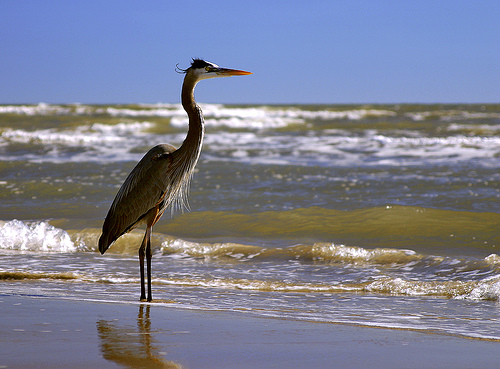

low_res: 
Image_reso:  (500, 369)


  0%|          | 0/20 [00:00<?, ?it/s]

OUTPUT
before_resize: 
image_resolution:  (704, 512)


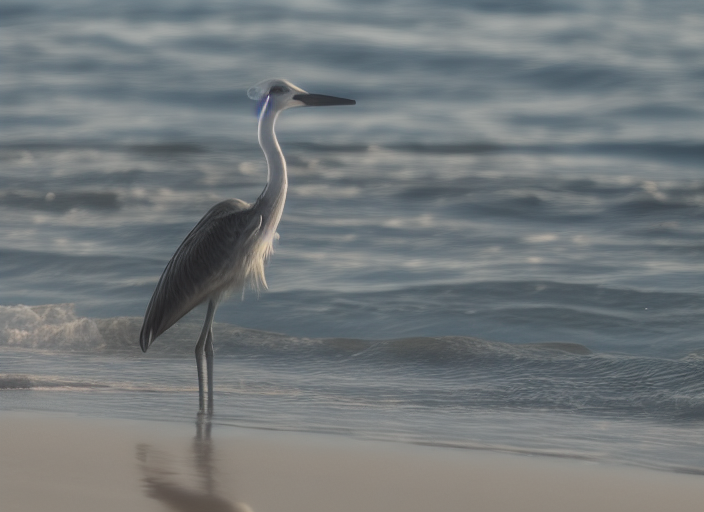

after_resize: 
image_resolution:  (128, 128)


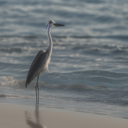

In [ ]:
image = load_image(
    "/content/99679241_adc853a5c0.jpg"
)

lr_image = load_image("/content/99679241_adc853a5c0.jpg")
new_size = (128,128)
# lr_image = lr_image.resize(new_size)
# image = image.resize(new_size)
print("type_input: ", type(image))
print("INPUT")
print("high_res: ")
print("Image_reso: ", image.size)
display(image)

print("low_res: ")
print("Image_reso: ", lr_image.size)
# display(lr_image)

processor = LineartDetector.from_pretrained("lllyasviel/Annotators")

control_image = processor(image)
control_image.save("/content/control.png")

# control_image = load_image("/content/17273391_55cfc7d3d4_line_art.jpg")
# print("type_canny: ",type(control_image))
control_image.save("/content/control1.png")

image = pipe("A water bird standing at the ocean's edge", num_inference_steps=20, generator=generator, control_image=image, image=control_image).images[0]

image.save('/content/image_out.png')
print("OUTPUT")
print("before_resize: ")
print("image_resolution: ", image.size)
display(image)
image = image.resize(new_size)
print("after_resize: ")
print("image_resolution: ", image.size)
display(image)


<h2> Caption + Depth Map </h2>

In [ ]:
!pip install diffusers transformers accelerate
!pip install xformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 85.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from PIL import Image
import numpy as np
import torch
from diffusers.utils import load_image

depth_estimator = pipeline('depth-estimation')

image = load_image("https://huggingface.co/lllyasviel/sd-controlnet-depth/resolve/main/images/stormtrooper.png")

image = depth_estimator(image)['depth']
image = np.array(image)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-depth", torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
# pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

image = pipe("Stormtrooper's lecture", image, num_inference_steps=20).images[0]

image.save('/content/stormtrooper_depth_out.png')



No model was supplied, defaulted to Intel/dpt-large and revision bc15f29 (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/20 [00:00<?, ?it/s]

type_input:  <class 'PIL.Image.Image'>
INPUT
high_res: 
Image_reso:  (500, 306)


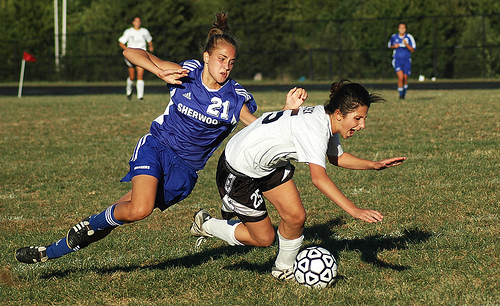

No model was supplied, defaulted to Intel/dpt-large and revision bc15f29 (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


  0%|          | 0/20 [00:00<?, ?it/s]

OUTPUT
before_resize: 
image_resolution:  (496, 304)


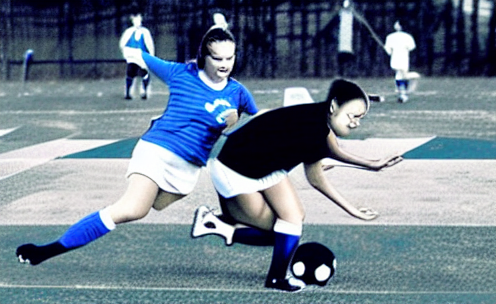

after_resize: 
image_resolution:  (128, 128)


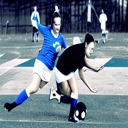

In [ ]:
image = load_image("/content/47871819_db55ac4699.jpg")

# lr_image = load_image("/content/99679241_adc853a5c0.jpg")
new_size = (128,128)
# lr_image = lr_image.resize(new_size)
# image = image.resize(new_size)
print("type_input: ", type(image))
print("INPUT")
print("high_res: ")
print("Image_reso: ", image.size)
display(image)

# print("low_res: ")
# print("Image_reso: ", lr_image.size)
# display(lr_image)

prompt = "The girl in the white strip is falling down as the girl in the blue strip challenges for the soccer ball"

depth_estimator = pipeline('depth-estimation')
image = depth_estimator(image)['depth']
image = np.array(image)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
control_image = Image.fromarray(image)

control_image.save("/content/control.png")

image = pipe(prompt, num_inference_steps=20, control_image=image, image=control_image).images[0]

image.save('/content/image_out.png')
print("OUTPUT")
print("before_resize: ")
print("image_resolution: ", image.size)
display(image)
image = image.resize(new_size)
print("after_resize: ")
print("image_resolution: ", image.size)
display(image)


<h2> SSIM </h2>

In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb

def calculate_image_mse(image_true, image_pred):
    """
    Calculate the Mean Squared Error (MSE) between two images.

    Parameters:
    image_true (numpy array): The ground truth image (actual values).
    image_pred (numpy array): The predicted/generated image.

    Returns:
    float: The Mean Squared Error.
    """
    # Ensure the images have the same shape
    if image_true.shape != image_pred.shape:
        raise ValueError("The input images must have the same dimensions.")

    # Compute MSE using scikit-image's built-in function
    mse = mean_squared_error(image_true, image_pred)
    return mse

if __name__ == "__main__":
    # Paths to the ground truth and predicted images
    image_true_path = "/content/99679241_adc853a5c0.jpg"
    image_pred_path = "/content/gen6(1).png"

    # Read the images from the given paths
    image_true = imread(image_true_path)
    image_pred = imread(image_pred_path)

    print("Original shapes:")
    print("True image shape:", image_true.shape)
    print("Predicted image shape:", image_pred.shape)

    # Resize predicted image to match the true image's dimensions
    image_pred_resized = resize(image_pred, image_true.shape, anti_aliasing=True)
    image_pred_resized = (image_pred_resized * 255).astype(image_true.dtype)

    # Ensure shapes match
    if image_true.shape != image_pred_resized.shape:
        raise ValueError("The resized image dimensions do not match.")

    # Calculate the MSE
    mse = calculate_image_mse(image_true, image_pred_resized)
    print(f"Mean Squared Error between images: {mse}")



Original shapes:
True image shape: (369, 500, 3)
Predicted image shape: (512, 512, 3)
Mean Squared Error between images: 4435.457880758808


<h2> MSE </h2>

In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb

def calculate_image_mse(image_true, image_pred):
    """
    Calculate the Mean Squared Error (MSE) between two images.

    Parameters:
    image_true (numpy array): The ground truth image (actual values).
    image_pred (numpy array): The predicted/generated image.

    Returns:
    float: The Mean Squared Error.
    """
    # Ensure the images have the same shape
    if image_true.shape != image_pred.shape:
        raise ValueError("The input images must have the same dimensions.")

    # Compute MSE using scikit-image's built-in function
    mse = mean_squared_error(image_true, image_pred)
    return mse

if __name__ == "__main__":
    # Paths to the ground truth and predicted images
    image_true_path = "/content/44129946_9eeb385d77.jpg"
    image_pred_path = "/content/gen1(1).png"

    # Read the images from the given paths
    image_true = imread(image_true_path)
    image_pred = imread(image_pred_path)

    print("Original shapes:")
    print("True image shape:", image_true.shape)
    print("Predicted image shape:", image_pred.shape)

    # Resize predicted image to match the true image's dimensions
    image_pred_resized = resize(image_pred, image_true.shape, anti_aliasing=True)
    image_pred_resized = (image_pred_resized * 255).astype(image_true.dtype)

    # Ensure shapes match
    if image_true.shape != image_pred_resized.shape:
        raise ValueError("The resized image dimensions do not match.")

    # Calculate the MSE
    mse = calculate_image_mse(image_true, image_pred_resized)
    print(f"Mean Squared Error between images: {mse}")


Original shapes:
True image shape: (375, 500, 3)
Predicted image shape: (512, 512, 3)
Mean Squared Error between images: 10684.071251555555


<h2> PSNR </h2>

In [ ]:
import numpy as np
import os
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb

def calculate_image_mse(image_true, image_pred):
    if image_true.shape != image_pred.shape:
        raise ValueError("The input images must have the same dimensions.")
    return mean_squared_error(image_true, image_pred)

def calculate_image_psnr(image_true, image_pred):
    if image_true.shape != image_pred.shape:
        raise ValueError("The input images must have the same dimensions.")
    return peak_signal_noise_ratio(image_true, image_pred, data_range=image_true.max() - image_true.min())

def calculate_metrics_for_single_image(true_image_path, pred_image_path):
    if not os.path.exists(true_image_path):
        raise FileNotFoundError(f"Ground truth image not found: {true_image_path}")
    if not os.path.exists(pred_image_path):
        raise FileNotFoundError(f"Predicted image not found: {pred_image_path}")

    image_true = imread(true_image_path)
    image_pred = imread(pred_image_path)

    # Ensure the images are in the same format
    if len(image_true.shape) == 2:
        image_true = gray2rgb(image_true)
    if len(image_pred.shape) == 2:
        image_pred = gray2rgb(image_pred)

    # Resize predicted image to match the ground truth dimensions
    if image_true.shape != image_pred.shape:
        image_pred = resize(image_pred, image_true.shape, anti_aliasing=True)
        image_pred = (image_pred * 255).astype(image_true.dtype)

    mse = calculate_image_mse(image_true, image_pred)
    psnr = calculate_image_psnr(image_true, image_pred)

    return {"MSE": mse, "PSNR": psnr}

# # Example usage
# if __name__ == "__main__":
#     true_image_path = "/content/44129946_9eeb385d77.jpg"
#     pred_image_path = "/content/image1.png"




MSE = 7045.72423306233, PSNR = 9.651547198090974 dB


<h2> LPIPS </h2>

In [ ]:
!pip install lpips


In [ ]:
import lpips
import torch
from PIL import Image
from torchvision import transforms

def calculate_lpips_score(true_image_path, pred_image_path, use_gpu=False):
    """
    Calculate the LPIPS score between two images.

    Parameters:
    true_image_path (str): Path to the ground truth image.
    pred_image_path (str): Path to the predicted/generated image.
    use_gpu (bool): Whether to use GPU for computation.

    Returns:
    float: The LPIPS score.
    """
    # Load the LPIPS model
    lpips_model = lpips.LPIPS(net='alex')  # Using AlexNet as the backbone
    if use_gpu and torch.cuda.is_available():
        lpips_model = lpips_model.cuda()

    # Define image transformation
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Resize to a fixed size
        transforms.ToTensor(),         # Convert to tensor
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
    ])

    # Load and transform images
    true_image = Image.open(true_image_path).convert("RGB")
    pred_image = Image.open(pred_image_path).convert("RGB")
    true_image = transform(true_image).unsqueeze(0)  # Add batch dimension
    pred_image = transform(pred_image).unsqueeze(0)

    # Move to GPU if available and requested
    if use_gpu and torch.cuda.is_available():
        true_image = true_image.cuda()
        pred_image = pred_image.cuda()

    # Compute LPIPS score
    lpips_score = lpips_model(true_image, pred_image)
    return lpips_score.item()




MSE = 6539.828524444444, PSNR = 9.975139996787917 dB
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS Score: 0.3392602205276489


/usr/local/lib/python3.10/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st

In [ ]:
# Example usage
if __name__ == "__main__":
    true_image_path = "/content/90011335_cfdf9674c2.jpg"
    pred_image_path = "/content/image_out5.png"

    metrics = calculate_metrics_for_single_image(true_image_path, pred_image_path)
    print(f"MSE = {metrics['MSE']}, PSNR = {metrics['PSNR']} dB")

    score = calculate_lpips_score(true_image_path, pred_image_path, use_gpu=True)
    print(f"LPIPS Score: {score}")

MSE = 3214.4224704704707, PSNR = 13.059774055107681 dB
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS Score: 0.5762360095977783


/usr/local/lib/python3.10/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st